# Outlier - The point outside the curve

"Observation which deviates so much from other observations as to arouse suspicion it was generated by a different mechanism" - Stephen Hawkins (1980)

How can an outlier affect the performance of your algorithm? How are they generated? How to detect? How to treat? These are some questions that I will try to answer in this small study.

## Outliers

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Univariate outlier

Text(0, 0.5, 'N° de anos')

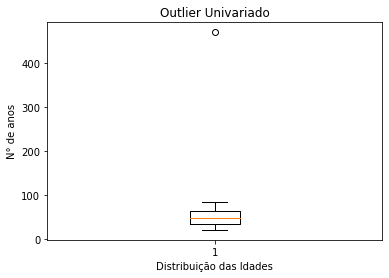

In [3]:
np.random.seed(5)
idade = np.random.randint(20,85, size=100)
idade[10]=470
plt.boxplot(idade, 0, 'o')
plt.title('Outlier Univariado')
plt.xlabel('Distribuição das Idades')
plt.ylabel('N° de anos')

### Multivariate outlier

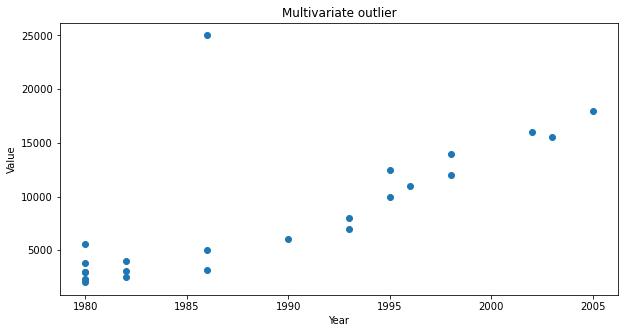

In [5]:
fig = plt.figure(figsize=(10,5))
ano = [1980,1982,1986,1980,1980,1982,1986,1980,1980,1982,1986,1980,1990,1993,1993,1995,1996,1995,1998,1998,2002,2003,2005]
valor = [2000,2500,3200,2300,3000,3100,5000,5600,3000,4000,3000,3800,6000,7000,8000,10000,11000,12500,12000,14000,16000,15500,18000]
valor[10]=25000
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Multivariate outlier')
plt.plot(ano, valor, "o")

## Effect of outliers on statistical analysis

### Dataset without outliers

In [6]:
data = pd.DataFrame({'Nome': ['José Carlos', 'Manuel da Silva', 'Maria Leite','Antônio Siveira','Pedro Lemos'],'Idade': [33, 57, 27,47,44]})
data = data[['Nome','Idade']]

In [7]:
data

,Nome,Idade
0,José Carlos,33
1,Manuel da Silva,57
2,Maria Leite,27
3,Antônio Siveira,47
4,Pedro Lemos,44


#### Statistics

In [8]:
# Mean:
print('Mean:', data.Idade.mean())
# Median:
print('Median:', data.Idade.median())
# Quantile:
print('Quantile:',data.Idade.quantile(q=0.25))
# Amplitude:
print('Amplitude:',data.Idade.max() - data.Idade.min())
# Standard deviation:
print('Standard deviation:',data.Idade.std())
# Absolute deviation:
print('Absolute deviation:',data.Idade.mad())

Man: 41.6
Median: 44.0
Quantile: 33.0
Amplitude: 30
Standard deviation: 11.823705003085962
Absolute deviation: 9.28


### Dataset with outliers

In [9]:
data = pd.DataFrame({'Nome': ['José Carlos', 'Manuel da Silva', 'Maria Leite','Antônio Siveira','Pedro Lemos'],'Idade': [33, 57, 27,470,44]})
data = data[['Nome','Idade']]

In [10]:
data

,Nome,Idade
0,José Carlos,33
1,Manuel da Silva,57
2,Maria Leite,27
3,Antônio Siveira,470
4,Pedro Lemos,44


#### Statistics

In [11]:
# Mean:
print('Mean:', data.Idade.mean())
# Median:
print('Median:', data.Idade.median())
# Quantile:
print('Quantile:',data.Idade.quantile(q=0.25))
# Amplitude:
print('Amplitude:',data.Idade.max() - data.Idade.min())
# Standard deviation:
print('Standard deviation:',data.Idade.std())
# Absolute deviation:
print('Absolute deviation:',data.Idade.mad())

Mean: 126.2
Median: 44.0
Quantile: 33.0
Amplitude: 443
Standard deviation: 192.52973796273656
Absolute deviation: 137.52000000000004


## Outlier effect

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Dataset without outliers

In [13]:
np.random.seed(4)
x = np.random.normal(0, 40, 20)
y = 10 + 3 * x + np.random.normal(0, 30, 20)

In [14]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [15]:
regr = linear_model.LinearRegression()

In [16]:
# Train the model using the training sets
regr.fit(x, y)

LinearRegression()

In [17]:
y_pred = regr.predict(x)

In [18]:
mean_absolute_error(y, y_pred) # sem outlier

29.880064234378445

Text(0.5, 1.0, 'Dataset without outliers.ipynb')

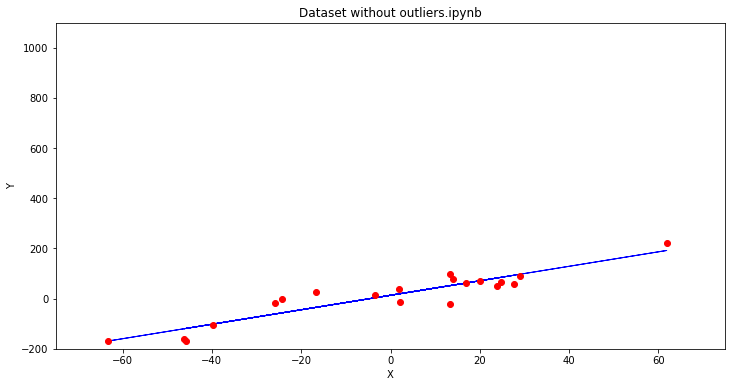

In [19]:
# Graph
fig = plt.figure(figsize=(12,6))
axes = plt.gca()
axes.set_xlim([-75,75])
axes.set_ylim([-200,1100])
plt.plot(x,y_pred, color='blue', linewidth=1)
plt.plot(x, y, "o",color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset without outliers.ipynb')

### Dataset with outliers

In [20]:
np.random.seed(4)
x = np.random.normal(0, 40, 20)
y = 10 + 3 * x + np.random.normal(0, 30, 20)
y[18] = 900 # outlier
y[19] = 950

In [21]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [22]:
regr = linear_model.LinearRegression()

In [23]:
# Train the model using the training sets
regr.fit(x, y)

LinearRegression()

In [24]:
y_pred = regr.predict(x)

In [25]:
mean_absolute_error(y, y_pred) # With outlier

152.15357811237217

Text(0.5, 1.0, 'Dataset with Outliers')

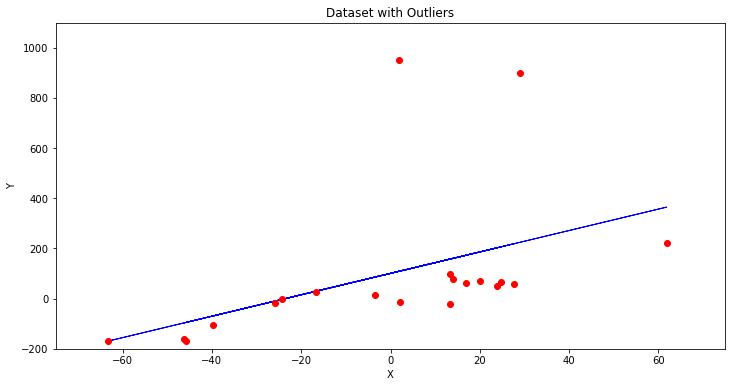

In [26]:
# Graph
fig = plt.figure(figsize=(12,6))
axes = plt.gca()
axes.set_xlim([-75,75])
axes.set_ylim([-200,1100])
plt.plot(x,y_pred, color='blue', linewidth=1)
plt.plot(x, y, "o",color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset with Outliers')

## Detecting outliers

In [30]:
temp = pd.DataFrame({'Sensor': ['Sensor 1', 'Sensor 2', 'Sensor 3','Sensor 4','Sensor 5','Sensor 6','Sensor 7','Sensor 8','Sensor 9','Sensor 10','Sensor 11','Sensor 12'],'Temperature °C': [71, 70, 73,70,70,69,70,72,71,300,71,69]})
temp = temp[['Sensor','Temperature °C']]

In [31]:
temp

,Sensor,Temperature °C
0,Sensor 1,71
1,Sensor 2,70
2,Sensor 3,73
3,Sensor 4,70
4,Sensor 5,70
5,Sensor 6,69
6,Sensor 7,70
7,Sensor 8,72
8,Sensor 9,71
9,Sensor 10,300


In [34]:
# Sorting the values:
np.sort(temp['Temperature °C'])

array([ 69,  69,  70,  70,  70,  70,  71,  71,  71,  72,  73, 300],
      dtype=int64)

In [35]:
# Calculating the median
temp['Temperature °C'].median()

70.5

In [36]:
# Calculating the lower quartile
q1 = temp['Temperature °C'].quantile(q=0.25)
print(q1)

70.0


In [37]:
# Calculating the upper quartile
q3 = temp['Temperature °C'].quantile(q=0.75)
print(q3)

71.25


In [39]:
# Calculate the internal barrier
# Interquartile range: moderate outliers
amp = q3 - q1
lim_max_i = q3 + 1.5 * amp 
lim_min_i = q1 - 1.5 * amp 

In [40]:
# Calculating the external barrier
# Interquartile range: extreme outliers
amp = q3 - q1
lim_max_e = q3 + 3 * amp 
lim_min_e = q1 - 3 * amp 

In [41]:
print('Internal limits:', lim_min_i, '-', lim_max_i)

Internal limits: 68.125 - 73.125


In [42]:
print('External limits:', lim_min_e, '-', lim_max_e)

External limits: 66.25 - 75.0
